In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import os

In [3]:
def get_results(dir, filename="pop_size_history.csv"):
    return pd.read_csv(os.path.join(dir, filename))

In [4]:
def import_all(soreb=True):
    settings = ["irvg", "dmd_halved", "gom_only", "dmd_halved_gom_only"] #, "irvg_new"
    if soreb:
        lms = ["mp-hg-gbo-with_clique_seeding-conditional", "mp-fg-gbo-with_clique_seeding-conditional"]
        problems = ["reb10-no-overlap_80"]
    else:
        lms = ["mp-hg-gbo-with_clique_seeding-conditional"] #, "mp-fg-gbo-with_clique_seeding-conditional"]
        problems = ["reb10-small-overlap_82"]
    elitist_update = ["fos_elitist", "gen_elitist"]
    results = []
    for problem in problems:
        for lm in lms:
            for setting in settings:
                for elitist in elitist_update:
                    df = get_results(f"../../pop_sweep_{setting}/{problem}_{lm}_{elitist}_incremental")
                    df["lm"] = "HG (GBO Clique Seeding)" if lm.count("mp-hg-gbo") else "FG (GBO Clique Seeding)"
                    df["elitist"] = "FOS Elitist" if elitist.count("fos") else "Generational Elitist"
                    df["problem"] = problem
                    df["setting"] = setting
                    results.append(df)
                
    return pd.concat(results, ignore_index=True)

def import_non_inc(soreb=True):
    if soreb:
        lms = ["mp-hg-gbo-with_clique_seeding-conditional", "mp-fg-gbo-with_clique_seeding-conditional"]
        problems = ["reb10-no-overlap_80"]
    else:
        lms = ["mp-hg-gbo-with_clique_seeding-conditional"] #, "mp-fg-gbo-with_clique_seeding-conditional"]
        problems = ["reb10-small-overlap_82"] #["reb10-no-overlap_80"]
    elitist_update = ["fos_elitist", "gen_elitist"]
    results = []
    for problem in problems:
        for lm in lms:
            for elitist in elitist_update:
                df = get_results(f"../../pop_sweep/{problem}_{lm}_{elitist}")
                df["lm"] = "HG (GBO Clique Seeding)" if lm.count("mp-hg-gbo") else "FG (GBO Clique Seeding)"
                df["elitist"] = "FOS Elitist" if elitist.count("fos") else "Generational Elitist"
                df["problem"] = problem
                df["setting"] = "NON INC"
                results.append(df)
                
    return pd.concat(results, ignore_index=True)

In [14]:
def has_twin(ax):
    for other_ax in ax.figure.axes:
        if other_ax is ax:
            continue
        if other_ax.bbox.bounds == ax.bbox.bounds:
            return True
    return False
    
def twin_lineplot(x,y,color,**kwargs):
    ax = plt.gca()
    if not has_twin(ax):
        ax = plt.twinx()
    else:
        ax = [x for x in ax.get_shared_x_axes().get_siblings(ax) if x is not ax][0]
    sn.lineplot(x=x,y=y,color=color,**kwargs, ax=ax, legend=False)
    if np.any(y > 0):
        ax.set_yscale("log")
        
def fix_log_y(**kwargs):
    ax = plt.gca()
    lim = list(ax.get_ylim())
    lim[0] = 1e5
    ax.set_ylim(lim)
    ax.grid(True, which="both")
    # ax.set_yscale("log")

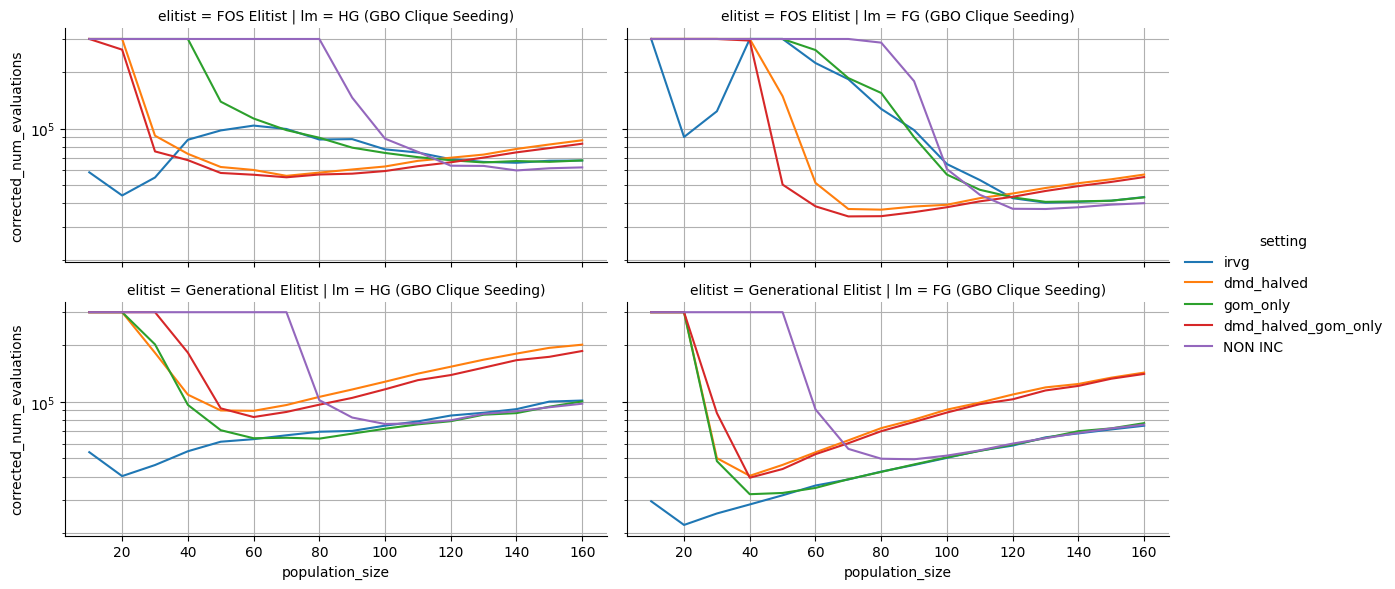

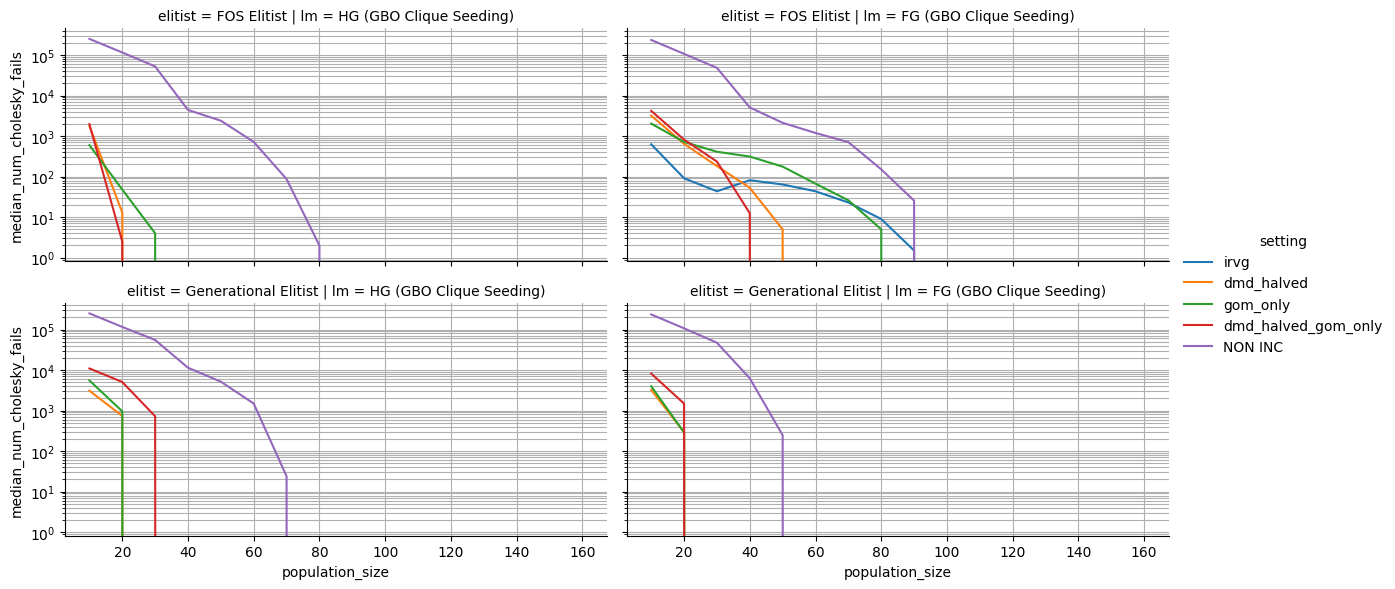

In [7]:
soreb = True
res = import_all(soreb)
non_inc = import_non_inc(soreb)
res = pd.concat([res, non_inc], ignore_index=True)
# res.loc[res["num_failures"] >= 0, "corrected_num_evaluations"] = res.loc[res["num_failures"] >= 0, "corrected_num_evaluations"] * (res.loc[res["num_failures"] >= 0, "num_failures"] / 30) + 1
res.loc[res["corrected_num_evaluations"] >= 3e5, "corrected_num_evaluations"] = 3e5
fg = sn.FacetGrid(res, hue="setting", col="lm", row="elitist", aspect=2)
fg.map(sn.lineplot, 'population_size', 'corrected_num_evaluations')
fg.map(fix_log_y)
# fg.map(twin_lineplot, 'population_size', 'median_num_cholesky_fails', linestyle="--")
# fg.map_dataframe(facetgrid_two_axes, x_name="population_size", y1_name="corrected_num_evaluations", y2_name="median_num_cholesky_fails", ylabel1='Num Evals', ylabel2='Cholesky Fails')
fg.set_xlabels('population_size')
fg.add_legend()
plt.show()
fg = sn.FacetGrid(res, hue="setting", col="lm", row="elitist", aspect=2)
fg.map(sn.lineplot, 'population_size', 'median_num_cholesky_fails')
fg.map(fix_log_y)
fg.set_xlabels('population_size')
fg.add_legend()
plt.show()
#pop_sweeps_settings_soreb_evals.png

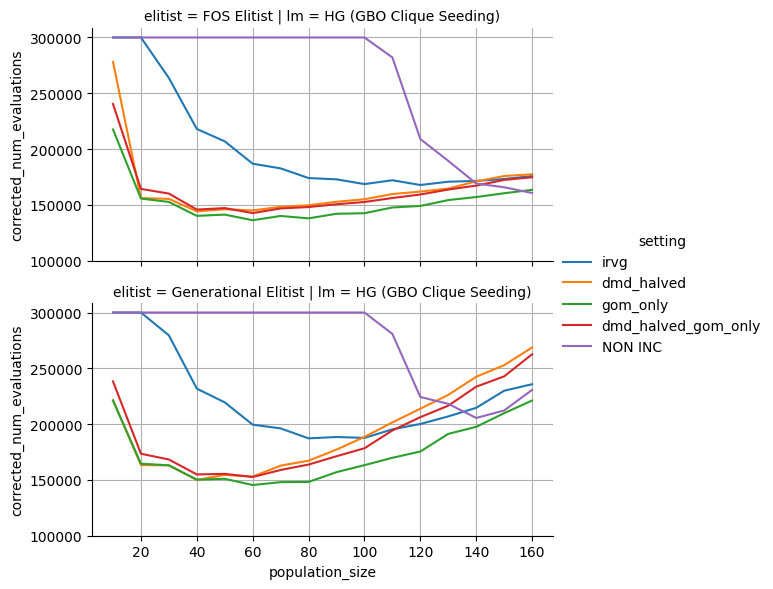

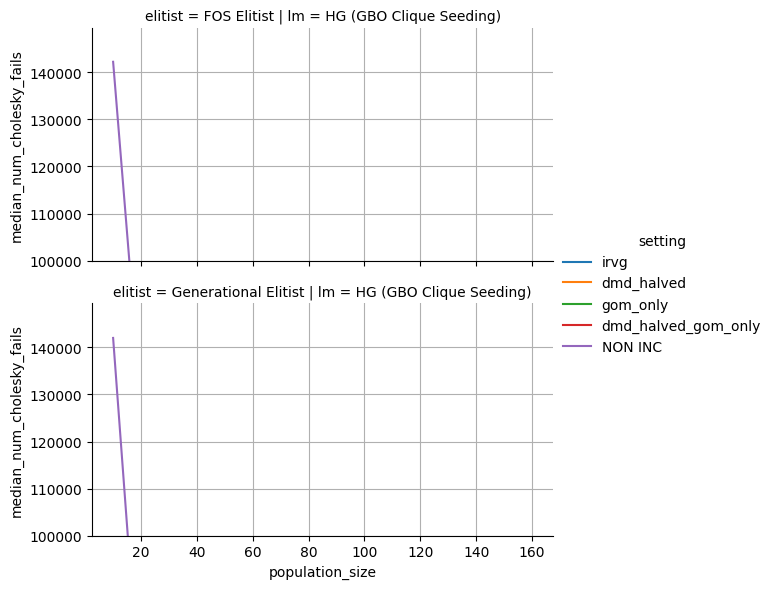

In [15]:
soreb = False
res = import_all(soreb)
non_inc = import_non_inc(soreb)
res = pd.concat([res, non_inc], ignore_index=True)
# res.loc[res["num_failures"] >= 0, "corrected_num_evaluations"] = res.loc[res["num_failures"] >= 0, "corrected_num_evaluations"] * (res.loc[res["num_failures"] >= 0, "num_failures"] / 30) + 1
res.loc[res["corrected_num_evaluations"] >= 3e5, "corrected_num_evaluations"] = 3e5
fg = sn.FacetGrid(res, hue="setting", col="lm", row="elitist", aspect=2)
fg.map(sn.lineplot, 'population_size', 'corrected_num_evaluations')
fg.map(fix_log_y)
# fg.map(twin_lineplot, 'population_size', 'median_num_cholesky_fails', linestyle="--")
# fg.map_dataframe(facetgrid_two_axes, x_name="population_size", y1_name="corrected_num_evaluations", y2_name="median_num_cholesky_fails", ylabel1='Num Evals', ylabel2='Cholesky Fails')
fg.set_xlabels('population_size')
fg.add_legend()
plt.show()
fg = sn.FacetGrid(res, hue="setting", col="lm", row="elitist", aspect=2)
fg.map(sn.lineplot, 'population_size', 'median_num_cholesky_fails')
fg.map(fix_log_y)
fg.set_xlabels('population_size')
fg.add_legend()
plt.show()
#pop_sweeps_settings_soreb_evals.png

In [11]:
res.loc[(res["elitist"] == "FOS Elitist	") & (res["problem"] == "reb10-small-overlap_82	")]

,Unnamed: 0,iteration,population_size,median_num_evaluations,corrected_num_evaluations,num_failures,median_num_cholesky_fails,lm,elitist,problem,setting
